In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

import ipy_table as tbl # for tables

%matplotlib inline

# Regex
import re

# Maths
import math
import scipy
from scipy.stats import pearsonr

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

### Data Exploration 

In [10]:
data = pd.read_csv("https://raw.githubusercontent.com/SudheenaMisra/Datasets/main/MA902/train.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
len(data)

891

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.shape

(891, 12)

lets consider only those features which are seems relevent to our analysis. We remove the coulumns passe Name','Ticket','Embarked','PassengerId' 

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# plt.figure(figsize= (8,5))
# #plot showing the count of survived ad not survived passengers
# sns.countplot(x="Survived",data=data)

In [17]:
# #Gender wise survival rate
# sns.countplot(x="Survived",data=data, hue= 'Sex')

In [18]:
# #plot showing survival rate based on passerger class
# #sns.countplot(x="Survived",data=data, hue= 'Pclass')
# Pclass_survival = data.groupby('Pclass')['Survived']
# Pclass_survival.value_counts().unstack().plot(kind="bar",stacked="True")


In [11]:
#Calculating the percentage of null values in age column
a = (data['Age'].isna().sum())/len(data)*100
#Calculating the percentage of null values in cabin column
b = (data['Cabin'].isna().sum())/len(data)*100

#creating a dictionary to display the null value % in age and cabin columns
d = {'Percentage_age_null':a, 'Percentage_cabin_null':b}
d

{'Percentage_age_null': 19.865319865319865,
 'Percentage_cabin_null': 77.10437710437711}

The age column has 19.86% of missing values and Cabin has 77.1% missing values. If the missing values are less than 30% we can handle it with the help of imputation. We can use imputation for age column but we can't do that for cabin column beacuse if we do it may lead to the overfitting.

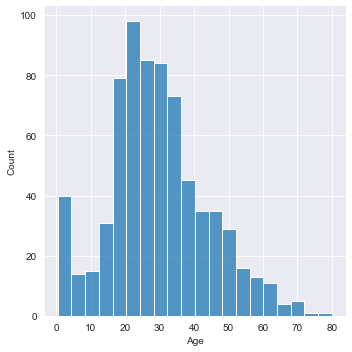

In [7]:
#Plotting age 
sns.displot(x="Age", data = data)

### Data Cleaning

In [8]:
# #Filling missing values of age column with its mean value
# data['Age'].fillna(data['Age'].mean(), inplace = True)

In [12]:
data['Age'].mean()

29.69911764705882

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Removing the irrelevant columns

In [13]:
data.drop(['Name',
           'Cabin',
            'Ticket',
            'Embarked',
             'Fare'],
            axis = 1,
            inplace = True)

In [32]:
data = data.dropna()

In [33]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
AgeGroup       0
dtype: int64

In [34]:
df = data
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,AgeGroup
0,1,0,3,male,22.0,1,0,20-29
1,2,1,1,female,38.0,1,0,30-39
2,3,1,3,female,26.0,0,0,20-29
3,4,1,1,female,35.0,1,0,30-39
4,5,0,3,male,35.0,0,0,30-39


<AxesSubplot:xlabel='Survived', ylabel='count'>

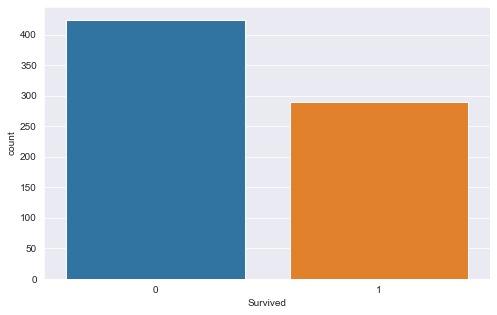

In [35]:
plt.figure(figsize= (8,5))
#plot showing the count of survived ad not survived passengers
sns.countplot(x="Survived",data=df)

In [36]:
df['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [37]:
# Show our contingency table crosstabulation
# Another method of grouping to form a crosstob
# ctGender = df[['Gender','Survival']].groupby(['Gender','Survival']).size().unstack(1)
ctGender = pd.crosstab(df.Sex,df.Survived)
ctGender

Survived,0,1
Sex,,
female,64,197
male,360,93


<AxesSubplot:xlabel='Survived', ylabel='count'>

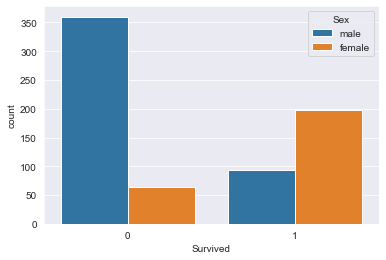

In [38]:
#Gender wise survival rate
sns.countplot(x="Survived",data=df, hue= 'Sex')

In [39]:
# Use Pearson's chi-squared test
chi2,p,dof,ex = scipy.stats.chi2_contingency(ctGender)
results = [['Item','Value'],
           ['Chi-Square Test',chi2],
           ['p-value', p],
           ['Degrees of freedom',dof]]
# setting up a nicer looking table.
tbl.make_table(results)
tbl.set_row_style(0, bold=True)
tbl.set_row_style(2,float_format='%0.3E');
tbl.render()

Item,Value
Chi-Square Test,205.0258
p-value,1.672E-46
Degrees of freedom,1


In [15]:
# # Defining Cramer's V since I couldn't find a library which had it
# def cramersV(N,nrows,ncols,chi2):
#     V = math.sqrt(chi2/(N*min(nrows-1,ncols-1)))
#     return V

In [22]:
# print('Cramer\'s V =',cramersV(len(df),len(ctGender.index),len(ctGender.columns),chi2))

In [40]:
# Create bins and two new columns, AgeGroup
bins = list(range(0,81,10))
bins[8] = 81
AgeGroups = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-80']
df['AgeGroup'] = pd.cut(df.Age, bins, right=False, labels=AgeGroups).astype('object')

C:\Users\Sudheena Sona\.conda\envs\ce802\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [41]:
# Create our contingency table
ctAge = pd.crosstab(df.AgeGroup,df.Survived)
ctAge

Survived,0,1
AgeGroup,,
0-9,24,38
10-19,61,41
20-29,143,77
30-39,94,73
40-49,55,34
50-59,28,20
60-69,13,6
70-80,6,1


<AxesSubplot:xlabel='AgeGroup'>

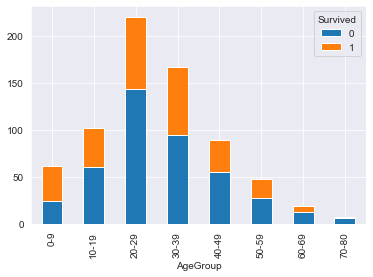

In [42]:
#plot showing survival rate based on passerger class
#sns.countplot(x="Survived",data=df, hue= 'Pclass')
age_survival = df.groupby('AgeGroup')['Survived']
age_survival.value_counts().unstack().plot(kind="bar",stacked="True")


In [43]:
age_survival.value_counts()

AgeGroup  Survived
0-9       1            38
          0            24
10-19     0            61
          1            41
20-29     0           143
          1            77
30-39     0            94
          1            73
40-49     0            55
          1            34
50-59     0            28
          1            20
60-69     0            13
          1             6
70-80     0             6
          1             1
Name: Survived, dtype: int64

In [47]:
# # Use Pearson's chi-squared test
# chi2,p,dof,ex = scipy.stats.chi2_contingency(ctAge)
# cV = cramersV(len(df),len(ctAge.index),len(ctAge.columns),chi2)
# results = [['Item','Value'],
#            ['Chi-Square Test',chi2],
#            ['P-Value', p],
#            ['Degrees of freedom',dof]
          
           
# # setting up a nicer looking table.
# tbl.make_table(results)
# tbl.set_row_style(0, bold=True);
# # tbl.set_row_style(2,float_format='%0.3E');

# Use Pearson's chi-squared test
chi2,p,dof,ex = scipy.stats.chi2_contingency(ctAge)
# cV = cramersV(len(df),len(ctAge.index),len(ctAge.columns),chi2)
results = [['Item','Value'],
           ['Chi-Square Test',chi2],
           ['P-Value', p],
           ['Degrees of freedom',dof]]

# setting up a nicer looking table.
tbl.make_table(results)
tbl.set_row_style(0, bold=True);
# tbl.set_row_style(2,float_format='%0.3E');


tbl.render()

Item,Value
Chi-Square Test,17.4277
P-Value,0.0148
Degrees of freedom,7


In [25]:
#Grouping all 3
ctGenderAge = df[['Sex','Age','Survived']].groupby(['Sex','Age','Survived']).size().unstack(fill_value=0)
ctGenderAge

Survived      0  1
Sex    Age        
female 0.75   0  2
       1.00   0  2
       2.00   4  2
       3.00   1  1
       4.00   0  5
...          .. ..
male   70.00  2  0
       70.50  1  0
       71.00  2  0
       74.00  1  0
       80.00  0  1

[145 rows x 2 columns]

In [26]:
# Selecting only the Ticket Class and Survival while counting in each size group
ctClass = df[['Pclass','Survived']].groupby(['Pclass','Survived']).size().unstack()
ctClass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Pclass'>

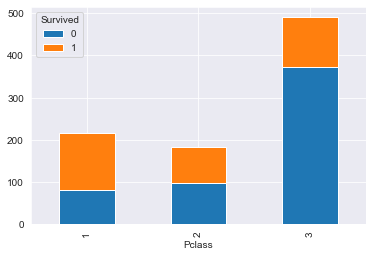

In [30]:
#plot showing survival rate based on passerger class
#sns.countplot(x="Survived",data=df, hue= 'Pclass')
Pclass_survival = df.groupby('Pclass')['Survived']
Pclass_survival.value_counts().unstack().plot(kind="bar",stacked="True")


In [32]:
# Use Pearson's chi-squared test
chi2,p,dof,ex = scipy.stats.chi2_contingency(ctClass)
cV = cramersV(len(df),len(ctClass.index),len(ctClass.columns),chi2)
results = [['Item','Value'],
           ['Chi-Square Test',chi2],
           ['P-Value', p],
           ['Degrees of freedom',dof]]
         
# setting up a nicer looking table.
tbl.make_table(results)
tbl.set_row_style(0, bold=True);
tbl.set_row_style(2,float_format='%0.3E');
tbl.render()

Item,Value
Chi-Square Test,102.8890
P-Value,4.549E-23
Degrees of freedom,2


Passengers in Titanic was of 15 to 40 years of age group mostly